In [1]:
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3a5c13ea-f4ea-47f6-8620-f793bd1ed4b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
    

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969648e+07,1.969648e+07,False,NaN,1,NaN,NaN,None,2024-05-10T16:26:00.000Z,61070.574791,2.731831e+10,6.4973,-0.162275,-2.376703,-1.227470,-11.256454,-15.572066,29.082610,1.202875e+12,53.1407,1.282482e+12,None,2024-05-10T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201073e+08,1.201073e+08,True,NaN,2,NaN,NaN,None,2024-05-10T16:25:00.000Z,2927.671897,1.156006e+10,2.3033,-0.475014,-3.199868,-5.107932,-15.793386,-27.202634,17.452495,3.516348e+11,15.5185,3.516348e+11,None,2024-05-10T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
2,825,Tether USDt,USDT,tether,85098,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108100e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-10T16:25:00.000Z,0.999675,4.971129e+10,6.4153,-0.017042,0.012351,-0.059780,-0.057236,-0.125413,-0.077474,1.107740e+11,4.8887,1.130498e+11,None,2024-05-10T16:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-10 19:26:53.729463
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475870e+08,1.475870e+08,False,NaN,4,NaN,NaN,None,2024-05-10T16:25:00.000Z,588.324270,1.540522e+09,-20.7518,0.157276,-1.535243,1.320079,-1.653952,14.232910,82.765337,8.682901e+10,3.8320,8.682901e+10,None,2024-05-10T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.482553e+08,5.757028e+08,True,NaN,5,NaN,NaN,None,2024-05-10T16:25:00.000Z,147.927967,2.531158e+09,7.8258,-0.168399,-0.186929,3.684903,-11.636421,1.198904,36.628673,6.630949e+10,2.9264,8.516254e+10,None,2024-05-10T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
5,3408,USDC,USDC,usd-coin,19021,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.308653e+10,3.308653e+10,False,NaN,6,NaN,NaN,None,2024-05-10T16:25:00.000Z,0.999972,5.803593e+09,12.0157,-0.002449,-0.004565,-0.010217,-0.005151,0.012085,-0.010793,3.308562e+10,1.4601,3.308562e+10,None,2024-05-10T16:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-10 19:26:53.729463
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-10T16:26:00.000Z,0.502005,1.071574e+09,4.1617,0.103567,-3.110422,-4.582276,-17.062684,-30.939292,-3.979517,2.779060e+10,1.2265,5.020053e+10,None,2024-05-10T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
7,11419,Toncoin,TON,toncoin,315,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473787e+09,5.106409e+09,True,NaN,8,3.414167e+09,2.311851e+10,None,2024-05-10T16:25:00.000Z,6.771349,7.766718e+08,112.8057,-0.902696,7.538971,22.815345,-0.317858,118.678882,226.052180,2.352222e+10,1.0381,3.457728e+10,None,2024-05-10T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 19:26:53.729463
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exch

In [6]:
def api_response():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3a5c13ea-f4ea-47f6-8620-f793bd1ed4b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'D:\Mohamed\Data science\Data analysis\PROJECTS\8-Automating API Pull And Visualizing Data Using Python\api_data.csv'):
        df.to_csv(r'D:\Mohamed\Data science\Data analysis\PROJECTS\8-Automating API Pull And Visualizing Data Using Python\api_data.csv',header='column_names')
    else :
         df.to_csv(r'D:\Mohamed\Data science\Data analysis\PROJECTS\8-Automating API Pull And Visualizing Data Using Python\api_data.csv',mode='a',header= False)

      

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_response()
    print('API Response is completed')
    sleep(60)
exit()

API Response is completed
API Response is completed
API Response is completed
API Response is completed
API Response is completed


KeyboardInterrupt: 

In [9]:
df_read = pd.read_csv(r'D:\Mohamed\Data science\Data analysis\PROJECTS\8-Automating API Pull And Visualizing Data Using Python\api_data.csv')
df_read

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969642e+07,1.969642e+07,False,NaN,1,NaN,NaN,NaN,2024-05-10T13:48:00.000Z,62959.874880,2.453108e+10,-0.1954,-0.211899,3.175210,2.075014,-6.889451,-12.201676,33.221324,1.240084e+12,53.2810,1.322157e+12,NaN,2024-05-10T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
1,1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201073e+08,1.201073e+08,True,NaN,2,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,3024.589667,1.005502e+10,-7.7963,-0.134376,2.098966,-1.229459,-12.024446,-25.100950,21.400644,3.632753e+11,15.6096,3.632753e+11,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
2,2,825,Tether USDt,USDT,tether,85094,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.109560e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,0.999970,4.514876e+10,0.4265,-0.023411,0.047500,-0.029691,0.043153,-0.024869,-0.050824,1.109527e+11,4.7675,1.130832e+11,NaN,2024-05-10T13:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-10 16:49:29.882701
3,3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475870e+08,1.475870e+08,False,NaN,4,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,595.627671,1.557062e+09,-15.3072,0.105048,0.735529,3.223805,2.624763,14.599331,85.141762,8.790690e+10,3.7774,8.790690e+10,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.482565e+08,5.757034e+08,True,NaN,5,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,152.930952,2.112900e+09,-7.3377,-0.455680,7.643165,6.588794,-7.195605,3.388399,41.723083,6.855230e+10,2.9458,8.804287e+10,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
5,5,3408,USDC,USDC,usd-coin,19017,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.310062e+10,3.310062e+10,False,NaN,6,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,1.000024,5.192714e+09,2.9563,-0.025546,0.012736,-0.029743,-0.010279,0.023626,0.006369,3.310142e+10,1.4224,3.310142e+10,NaN,2024-05-10T13:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-10 16:49:29.882701
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-10T13:48:00.000Z,0.512741,9.239338e+08,-10.1502,-0.091802,0.372081,-2.245164,-14.678264,-17.525684,-1.663535,2.838493e+10,1.2197,5.127412e+10,NaN,2024-05-10T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
7,7,11419,Toncoin,TON,toncoin,315,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.473780e+09,5.106402e+09,True,NaN,8,3.414167e+09,2.376997e+10,NaN,2024-05-10T13:47:00.000Z,6.962159,7.341829e+08,174.7531,-1.468350,16.427126,26.099243,3.692637,124.846942,236.101583,2.418501e+10,1.0392,3.555158e+10,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
8,8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'm

In [10]:
pd.set_option('display.float.format',lambda x:'%.5f' % x)

In [11]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.50291,-2.53110,-1.75033,-11.64800,-16.15151,28.76423
Ethereum,-0.67093,-3.27478,-5.33988,-16.24653,-27.48622,17.12675
Tether USDt,-0.01376,0.00484,-0.05592,-0.01878,-0.09911,-0.06533
BNB,-0.11111,-1.48221,1.08807,-1.90954,14.14014,82.32481
Solana,-0.53679,-0.45394,3.17664,-12.32722,0.60888,35.83808
USDC,-0.00810,-0.00668,-0.00875,-0.00331,0.02899,0.00279
XRP,-0.17440,-3.25551,-4.75636,-17.35004,-31.26208,-4.25055
Toncoin,-1.12349,7.22958,22.21492,-0.42026,116.83015,224.36891
Dogecoin,-0.72094,-3.42827,3.11941,-24.92290,-16.60774,78.23057


In [12]:
df3=df2.stack()
df3

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.50291
              quote.USD.percent_change_24h    -2.53110
              quote.USD.percent_change_7d     -1.75033
              quote.USD.percent_change_30d   -11.64800
              quote.USD.percent_change_60d   -16.15151
              quote.USD.percent_change_90d    28.76423
Ethereum      quote.USD.percent_change_1h     -0.67093
              quote.USD.percent_change_24h    -3.27478
              quote.USD.percent_change_7d     -5.33988
              quote.USD.percent_change_30d   -16.24653
              quote.USD.percent_change_60d   -27.48622
              quote.USD.percent_change_90d    17.12675
Tether USDt   quote.USD.percent_change_1h     -0.01376
              quote.USD.percent_change_24h     0.00484
              quote.USD.percent_change_7d     -0.05592
              quote.USD.percent_change_30d    -0.01878
              quote.USD.percent_change_60d    -0.09911
              quote.US

In [13]:
type(df3)

pandas.core.series.Series

In [14]:
df4 = df3.to_frame(name='values')
df4

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.50291
             quote.USD.percent_change_24h  -2.53110
             quote.USD.percent_change_7d   -1.75033
             quote.USD.percent_change_30d -11.64800
             quote.USD.percent_change_60d -16.15151
             quote.USD.percent_change_90d  28.76423
Ethereum     quote.USD.percent_change_1h   -0.67093
             quote.USD.percent_change_24h  -3.27478
             quote.USD.percent_change_7d   -5.33988
             quote.USD.percent_change_30d -16.24653
             quote.USD.percent_change_60d -27.48622
             quote.USD.percent_change_90d  17.12675
Tether USDt  quote.USD.percent_change_1h   -0.01376
             quote.USD.percent_change_24h   0.00484
             quote.USD.percent_change_7d   -0.05592
             quote.USD.percent_change_30d  -0.01878
             quote.USD.percent_change_60d  -0.09911
             quote.USD.percent_change_90d  -0.06533
BNB          quote.USD.percent_change_1h   -0.11111
             quote.USD.percent_change_24h  -1.48221
             quote.USD.percent_change_7d    1.08807
             quote.USD.percent_change_30d  -1.90954
             quote.USD.percent_change_60d  14.14014
             quote.USD.percent_change_90d  82.32481
Solana       quote.USD.percent_change_1h   -0.53679
             quote.USD.percent_change_24h  -0.45394
             quote.USD.percent_change_7d    3.17664
             quote.USD.percent_change_30d -12.32722
             quote.USD.percent_change_60d   0.60888
             quote.USD.percent_change_90d  35.83808
USDC         quote.USD.percent_change_1h   -0.00810
             quote.USD.percent_change_24h  -0.00668
             quote.USD.percent_change_7d   -0.00875
             quote.USD.percent_change_30d  -0.00331
             quote.USD.percent_change_60d   0.02899
             quote.USD.percent_change_90d   0.00279
XRP          quote.USD.percent_change_1h   -0.17440
             quote.USD.percent_change_24h  -3.25551
             quote.USD.percent_change_7d   -4.75636
             quote.USD.percent_change_30d -17.35004
             quote.USD.percent_change_60d -31.26208
             quote.USD.percent_change_90d  -4.25055
Toncoin      quote.USD.percent_change_1h   -1.12349
             quote.USD.percent_change_24h   7.22958
             quote.USD.percent_change_7d   22.21492
             quote.USD.percent_change_30d  -0.42026
             quote.USD.percent_change_60d 116.83015
             quote.USD.percent_change_90d 224.36891
Dogecoin     quote.USD.percent_change_1h   -0.72094
             quote.USD.percent_change_24h  -3.42827
             quote.USD.percent_change_7d    3.11941
             quote.USD.percent_change_30d -24.92290
             quote.USD.percent_change_60d -16.60774
             quote.USD.percent_change_90d  78.23057
Cardano      quote.USD.percent_change_1h   -0.38561
             quote.USD.percent_change_24h  -1.85498
             quote.USD.percent_change_7d   -4.09091
             quote.USD.percent_change_30d -21.71922
             quote.USD.percent_change_60d -41.48120
             quote.USD.percent_change_90d -16.37469
Shiba Inu    quote.USD.percent_change_1h   -0.60703
             quote.USD.percent_change_24h  -3.65043
             quote.USD.percent_change_7d   -7.18942
             quote.USD.percent_change_30d -19.05005
             quote.USD.percent_change_60d -30.23322
             quote.USD.percent_change_90d 139.55734
Avalanche    quote.USD.percent_change_1h   -0.04382
             quote.USD.percent_change_24h  -0.10870
             quote.USD.percent_change_7d   -2.05840
             quote.USD.percent_change_30d -26.13096
             quote.USD.percent_change_60d -25.65025
             quote.USD.percent_change_90d -11.64954
TRON         quote.USD.percent_change_1h    0.00215
             quote.USD.percent_change_24h  -0.35254
             quote.USD.percent_change_7d    2.00374
             quote.USD.percent_change_30d

In [15]:
df4.count()

values    90
dtype: int64

In [16]:
index=pd.Index(range(90))

In [17]:
df5=df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.50291
1,Bitcoin,quote.USD.percent_change_24h,-2.53110
2,Bitcoin,quote.USD.percent_change_7d,-1.75033
3,Bitcoin,quote.USD.percent_change_30d,-11.64800
4,Bitcoin,quote.USD.percent_change_60d,-16.15151
5,Bitcoin,quote.USD.percent_change_90d,28.76423
6,Ethereum,quote.USD.percent_change_1h,-0.67093
7,Ethereum,quote.USD.percent_change_24h,-3.27478
8,Ethereum,quote.USD.percent_change_7d,-5.33988
9,Ethereum,quote.USD.percent_change_30d,-16.24653


In [18]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.50291
1,Bitcoin,quote.USD.percent_change_24h,-2.53110
2,Bitcoin,quote.USD.percent_change_7d,-1.75033
3,Bitcoin,quote.USD.percent_change_30d,-11.64800
4,Bitcoin,quote.USD.percent_change_60d,-16.15151
5,Bitcoin,quote.USD.percent_change_90d,28.76423
6,Ethereum,quote.USD.percent_change_1h,-0.67093
7,Ethereum,quote.USD.percent_change_24h,-3.27478
8,Ethereum,quote.USD.percent_change_7d,-5.33988
9,Ethereum,quote.USD.percent_change_30d,-16.24653


In [19]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.50291
1,Bitcoin,24h,-2.53110
2,Bitcoin,7d,-1.75033
3,Bitcoin,30d,-11.64800
4,Bitcoin,60d,-16.15151
5,Bitcoin,90d,28.76423
6,Ethereum,1h,-0.67093
7,Ethereum,24h,-3.27478
8,Ethereum,7d,-5.33988
9,Ethereum,30d,-16.24653


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


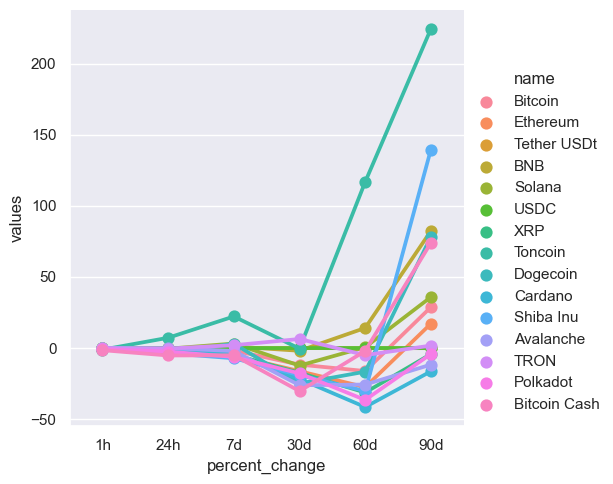

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [48]:
df_read_2 = pd.read_csv(r'D:\Mohamed\Data science\Data analysis\PROJECTS\8-Automating API Pull And Visualizing Data Using Python\api_data.csv')
df_read_2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19696421.00000,19696421.00000,False,NaN,1,NaN,NaN,NaN,2024-05-10T13:48:00.000Z,62959.87488,24531076565.88650,-0.19540,-0.21190,3.17521,2.07501,-6.88945,-12.20168,33.22132,1240084201747.76270,53.28100,1322157372484.21997,NaN,2024-05-10T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
1,1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120107309.98633,120107309.98633,True,NaN,2,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,3024.58967,10055021081.59061,-7.79630,-0.13438,2.09897,-1.22946,-12.02445,-25.10095,21.40064,363275328672.28619,15.60960,363275328672.28998,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
2,2,825,Tether USDt,USDT,tether,85094,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110955976510.79590,113086550461.08405,True,NaN,3,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,0.99997,45148759765.47176,0.42650,-0.02341,0.04750,-0.02969,0.04315,-0.02487,-0.05082,110952668364.70654,4.76750,113083178792.05000,NaN,2024-05-10T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-10 16:49:29.882701
3,3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587000.00178,147587000.00178,False,NaN,4,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,595.62767,1557062071.06125,-15.30720,0.10505,0.73553,3.22381,2.62476,14.59933,85.14176,87906901073.14952,3.77740,87906901073.14999,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448256546.12765,575703433.27585,True,NaN,5,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,152.93095,2112899606.17303,-7.33770,-0.45568,7.64316,6.58879,-7.19561,3.38840,41.72308,68552300314.24265,2.94580,88042874088.06000,NaN,2024-05-10T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
5,5,3408,USDC,USDC,usd-coin,19017,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33100621183.80460,33100621183.80460,False,NaN,6,NaN,NaN,NaN,2024-05-10T13:47:00.000Z,1.00002,5192713772.20657,2.95630,-0.02555,0.01274,-0.02974,-0.01028,0.02363,0.00637,33101417860.28194,1.42240,33101417860.28000,NaN,2024-05-10T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-10 16:49:29.882701
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,NaN,2024-05-10T13:48:00.000Z,0.51274,923933772.58500,-10.15020,-0.09180,0.37208,-2.24516,-14.67826,-17.52568,-1.66353,28384932833.73570,1.21970,51274124127.83000,NaN,2024-05-10T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-10 16:49:29.882701
7,7,11419,Toncoin,TON,toncoin,315,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3473780265.82753,5106402363.25713,True,NaN,8,3414166606.00000,23769969742.92660,NaN,2024-05-10T13:47:00.000Z,6.96216,734182917.98565,174.75310,-1.46835,16.42713,26.09924,3.69264,124.84694,236.10158,24185009503.39856,1.03920,35551583644.61000,

In [49]:
df7 = df_read_2[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,62959.87488,2024-05-10 16:49:29.882701
15,Bitcoin,63028.75395,2024-05-10 16:50:30.680940
30,Bitcoin,61024.29927,2024-05-10 19:28:32.652792
45,Bitcoin,60986.50391,2024-05-10 19:29:33.484561
60,Bitcoin,60910.04715,2024-05-10 19:30:34.271491
75,Bitcoin,60842.90006,2024-05-10 19:31:35.193125
90,Bitcoin,60887.75091,2024-05-10 19:32:36.705159


D:\Anaconda_installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda_installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quote.USD.price', ylabel='timestamp'>

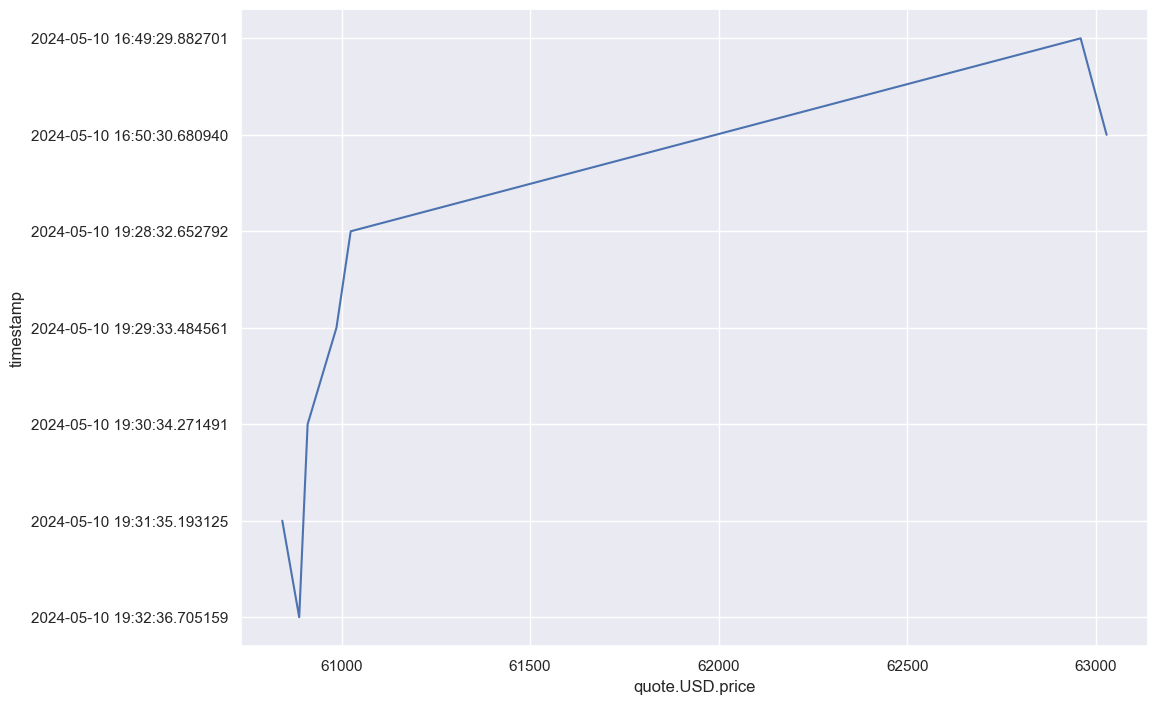

In [53]:
sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='quote.USD.price', y='timestamp', data = df7)